## Advanced exploratory data analysis (EDA)

[Exploratory data analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis) 
### Nepisano pravilo: 80% EDA & 20% ML pa počnimo!

### Tri osnovne EDA faze (rekurentna definicija):

1. **Structure Investigation**: Exploring the general shape of the dataset, as well as the data types of your features.
2. **Quality Investigation**: Get a feeling for the general quality of the dataset, with regards to duplicates, missing values and unwanted entries.
3. **Content Investigation**: Once the structure and quality of the dataset is understood, we can go ahead and perform a more in-depth exploration on the features values and look at how different features relate to each other. Check step 1.

### Data:

**Road safety dataset**: https://www.openml.org/d/42803 from [OpenML](https://www.openml.org/search?type=data).

In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_rows', None, 'display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [3]:
from sklearn.datasets import fetch_openml

dataset = fetch_openml(data_id=42803, as_frame=True)
df = dataset["frame"] # Get DataFrame

In [5]:
df.head(5) # first 5

,Accident_Index,Vehicle_Reference_df_res,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_Home_Area_Type,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Vehicle_Reference_df,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,201501BS70001,1.0,19.0,0.0,9.0,0.0,8.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,NaN,NaN,2143.0,2.0,4.0,NaN,525130.0,180050.0,-0.198465,51.505538,1.0,3.0,1.0,1.0,12/01/2015,2.0,18:45,12.0,E09000020,5.0,0.0,6.0,30.0,3.0,4.0,6.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002825,1.0,1.0,3.0,2.0,41.0,7.0,3.0,5.0,1.0,0.0,0.0,2.0,0.0,NaN,NaN
1,201501BS70002,1.0,9.0,0.0,9.0,0.0,8.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0,1.0,NaN,NaN,1600.0,1.0,3.0,NaN,526530.0,178560.0,-0.178838,51.491836,1.0,3.0,1.0,1.0,12/01/2015,2.0,07:50,12.0,E09000020,6.0,0.0,6.0,30.0,3.0,4.0,3.0,3218.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002820,1.0,1.0,3.0,1.0,24.0,5.0,3.0,9.0,9.0,0.0,0.0,2.0,0.0,1.0,3.0
2,201501BS70004,1.0,9.0,0.0,9.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0,1.0,30.0,6.0,1686.0,2.0,10.0,1.0,524610.0,181080.0,-0.205590,51.514910,1.0,3.0,1.0,1.0,12/01/2015,2.0,18:08,12.0,E09000020,4.0,415.0,6.0,30.0,2.0,4.0,6.0,0.0,0.0,1.0,4.0,2.0,2.0,0.0,0.0,1.0,1.0,E01002833,1.0,1.0,3.0,2.0,33.0,6.0,3.0,1.0,3.0,0.0,0.0,2.0,0.0,1.0,6.0
3,201501BS70005,1.0,9.0,0.0,9.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,524420.0,181080.0,-0.208327,51.514952,1.0,3.0,1.0,1.0,13/01/2015,3.0,07:40,12.0,E09000020,4.0,450.0,6.0,30.0,6.0,4.0,6.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,2.0,E01002874,1.0,1.0,3.0,2.0,9.0,2.0,3.0,5.0,1.0,0.0,0.0,2.0,0.0,1.0,2.0
4,201501BS70008,1.0,1.0,0.0,18.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,48.0,8.0,NaN,NaN,NaN,1.0,524630.0,179040.0,-0.206022,51.496572,1.0,2.0,2.0,1.0,09/01/2015,6.0,07:30,12.0,E09000020,3.0,315.0,6.0,30.0,6.0,2.0,3.0,3220.0,0.0,5.0,1.0,2.0,2.0,0.0,0.0,1.0,2.0,E01002814,1.0,1.0,1.0,1.0,48.0,8.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0


In [6]:
df.sample(5) # random 5

,Accident_Index,Vehicle_Reference_df_res,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_Home_Area_Type,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Vehicle_Reference_df,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
243931,201543P288025,1.0,9.0,0.0,18.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,453283.0,204082.0,-1.229853,51.732926,43.0,3.0,2.0,1.0,26/02/2015,5.0,09:15,482.0,E10000025,3.0,4158.0,6.0,30.0,3.0,4.0,6.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,1.0,E01028575,2.0,1.0,1.0,2.0,56.0,9.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0
342948,201563DP38715,1.0,9.0,0.0,16.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,6.0,1.0,25.0,5.0,NaN,NaN,NaN,2.0,304320.0,255570.0,-3.401071,52.190042,63.0,3.0,4.0,4.0,10/12/2015,5.0,18:16,753.0,W06000023,3.0,483.0,6.0,60.0,0.0,NaN,NaN,0.0,0.0,0.0,6.0,2.0,2.0,4.0,2.0,2.0,1.0,W01000438,2.0,2.0,1.0,2.0,53.0,8.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,2.0,NaN
102566,201511SC25965,1.0,9.0,0.0,18.0,0.0,0.0,1.0,0.0,7.0,3.0,4.0,1.0,6.0,1.0,27.0,6.0,1396.0,1.0,11.0,3.0,401283.0,522444.0,-1.981657,54.597176,11.0,3.0,2.0,2.0,13/12/2015,1.0,18:35,169.0,E06000047,4.0,6278.0,6.0,60.0,0.0,NaN,NaN,0.0,0.0,0.0,6.0,7.0,2.0,0.0,0.0,2.0,1.0,E01020857,2.0,2.0,1.0,1.0,61.0,9.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,3.0,7.0
145880,201520H008155,1.0,9.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,6.0,2.0,44.0,7.0,1596.0,1.0,2.0,1.0,400680.0,301310.0,-1.991392,52.609569,20.0,3.0,2.0,2.0,31/08/2015,2.0,11:12,307.0,E08000030,6.0,0.0,6.0,30.0,0.0,NaN,NaN,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,1.0,E01010282,1.0,2.0,2.0,2.0,20.0,4.0,3.0,0.0,0.0,1.0,0.0,0.0,9.0,1.0,1.0
36598,201501SX20609,2.0,9.0,0.0,18.0,0.0,0.0,0.0,0.0,4.0,6.0,3.0,1.0,1.0,1.0,44.0,7.0,1400.0,2.0,8.0,1.0,523830.0,188180.0,-0.214328,51.578889,1.0,3.0,2.0,1.0,30/06/2015,3.0,07:25,30.0,E09000003,3.0,406.0,3.0,40.0,0.0,NaN,NaN,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,E01000311,2.0,1.0,1.0,1.0,44.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,4.0


## 1. Structure Investigation

In [7]:
df.shape

(363243, 67)

In [8]:
print(f'Baza podataka ima {df.shape[0]} redova i {df.shape[1]} kolona.')

Baza podataka ima 363243 redova i 67 kolona.


In [9]:
df.dtypes

Accident_Index                                  object
Vehicle_Reference_df_res                       float64
Vehicle_Type                                   float64
Towing_and_Articulation                        float64
Vehicle_Manoeuvre                              float64
Vehicle_Location-Restricted_Lane               float64
Junction_Location                              float64
Skidding_and_Overturning                       float64
Hit_Object_in_Carriageway                      float64
Vehicle_Leaving_Carriageway                    float64
Hit_Object_off_Carriageway                     float64
1st_Point_of_Impact                            float64
Was_Vehicle_Left_Hand_Drive?                   float64
Journey_Purpose_of_Driver                      float64
Sex_of_Driver                                   object
Age_of_Driver                                  float64
Age_Band_of_Driver                             float64
Engine_Capacity_(CC)                           float64
Propulsion

In [10]:
# count all data types in dataset
pd.value_counts(df.dtypes)

float64    61
object      6
dtype: int64

### 1.1. Categorical data

In [11]:
# Display non-numerical features
df.select_dtypes(exclude="number").head()

,Accident_Index,Sex_of_Driver,Date,Time,Local_Authority_(Highway),LSOA_of_Accident_Location
0,201501BS70001,1.0,12/01/2015,18:45,E09000020,E01002825
1,201501BS70002,1.0,12/01/2015,07:50,E09000020,E01002820
2,201501BS70004,1.0,12/01/2015,18:08,E09000020,E01002833
3,201501BS70005,1.0,13/01/2015,07:40,E09000020,E01002874
4,201501BS70008,1.0,09/01/2015,07:30,E09000020,E01002814


Change categorical column to numerical by converting it:

In [12]:
df["Sex_of_Driver"] = df["Sex_of_Driver"].astype("float")

Change categorical column to numerical by creating dummy variables:

In [19]:
pd.get_dummies(df.loc[:1000, 'Local_Authority_(Highway)'])

,E09000013,E09000020,E09000033
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0
6,0,1,0
7,0,1,0
8,0,1,0
9,0,1,0


In [20]:
df.describe(exclude="number")

,Accident_Index,Date,Time,Local_Authority_(Highway),LSOA_of_Accident_Location
count,363243,319866,319822,319866,298758
unique,140056,365,1439,204,25979
top,201543P296025,14/02/2015,17:30,E10000017,E01028497
freq,1332,2144,2972,8457,1456


### 1.2.Numerical data

In [21]:
unique_values = df.select_dtypes(include="number").nunique().sort_values()

In [22]:
# Discrete or continual?
unique_values
# NA values included!!!

Urban_or_Rural_Area                                 2
Sex_of_Casualty                                     2
Was_Vehicle_Left_Hand_Drive?                        2
Did_Police_Officer_Attend_Scene_of_Accident         3
Casualty_Class                                      3
Sex_of_Driver                                       3
Accident_Severity                                   3
Casualty_Severity                                   3
Car_Passenger                                       3
Casualty_Home_Area_Type                             3
Pedestrian_Road_Maintenance_Worker                  3
Pedestrian_Crossing-Human_Control                   3
Driver_Home_Area_Type                               3
Junction_Control                                    4
Road_Surface_Conditions                             5
1st_Point_of_Impact                                 5
Bus_or_Coach_Passenger                              5
Light_Conditions                                    5
2nd_Road_Class              

<AxesSubplot:title={'center':'Unique values per feature'}>

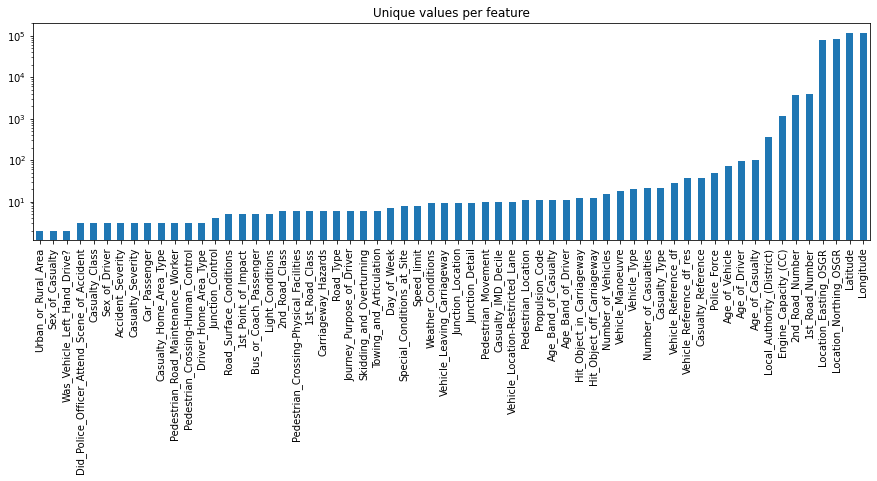

In [23]:
unique_values.plot.bar(logy=True,figsize=(15, 4), title="Unique values per feature")

In [24]:
df.describe(include="number") # different metrics for numerical data

,Vehicle_Reference_df_res,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_Home_Area_Type,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Vehicle_Reference_df,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
count,363243.000000,363181.000000,362864.000000,363059.000000,363067.000000,363159.000000,363067.000000,363080.000000,363084.000000,363242.000000,363037.000000,361760.000000,363221.000000,363243.000000,327374.000000,327374.000000,269897.000000,270607.000000,256138.000000,302534.000000,319793.000000,3.197930e+05,319793.000000,319793.000000,319866.000000,319866.000000,319866.000000,319866.000000,319866.000000,319866.000000,319866.000000,319866.000000,319866.000000,319866.000000,319864.000000,189222.000000,188201.000000,318416.000000,319547.000000,319564.000000,319866.000000,319866.000000,319350.000000,319626.000000,319653.000000,319866.000000,319842.000000,363243.000000,363243.000000,363243.000000,363109.000000,357674.000000,357674.000000,363243.000000,363241.000000,363241.000000,362481.000000,363197.000000,363077.000000,363243.000000,323448.000000,293666.000000
mean,1.696203,9.756953,0.029766,12.607326,0.109233,2.609361,0.188139,0.307480,0.366689,0.546699,1.775279,1.005396,4.796350,1.397607,40.314826,6.887147,1930.519161,1.510903,8.003014,1.336475,433746.096165,3.123811e+05,-1.517850,52.700035,28.151513,2.819453,2.389948,2.104638,4.118287,326.173995,3.927298,995.692687,5.095449,40.047739,2.315650,3.618379,5.219707,396.141472,0.006318,0.777882,1.927029,1.515919,1.308555,0.104938,0.069841,1.381031,1.163140,1.680492,1.564928,1.380384,1.410948,37.140866,6.431284,2.875725,0.380731,0.276467,0.281027,0.066127,0.032833,7.840080,1.308186,5.107323
std,1.487094,8.315189,0.294127,6.218689,0.903131,3.249245,0.714243,1.595551,1.374107,2.094845,1.121195,0.073258,2.017689,0.590480,16.148168,1.756323,1675.649521,0.850093,4.964995,0.683579,92921.345656,1.533975e+05,1.368987,1.381051,25.464133,0.432722,2.440132,2.810895,1.937043,258.205242,1.458027,1836.331271,1.648723,14.842666,2.538715,0.783939,1.246952,1329.150573,0.105909,1.866213,1.624902,1.512854,0.541693,0.695653,0.563111,0.485641,0.375845,1.263753,1.693180,0.615265,0.492007,18.276810,2.157860,0.355195,1.522220,1.294574,0.591239,0.493174,0.253780,7.366436,0.657776,2.829458
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000,1.000000,1.000000,1.000000,70860.000000,1.062800e+04,-7.422915,49.915618,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.000000,9.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.0

## 2. Quality Investigation

Duplicates, missing values and outliers.

### 2.1. Duplicates

In [25]:
n_duplicates = df.drop(labels=["Accident_Index"], axis=1).duplicated().sum() # without Accident_Index column
print(f"Postoji {n_duplicates} duplikata u bazi podataka.")

Postoji 22 duplikata u bazi podataka.


In [26]:
# Drop duplicates
df = df.drop_duplicates(subset=df.drop(labels=["Accident_Index"], axis=1).columns)
df.shape

(363221, 67)

### 2.2. Missing values

### 2.2.1. Per sample (row)

<AxesSubplot:ylabel='Frequency'>

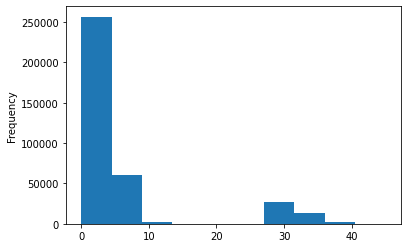

In [27]:
df.isna().sum(axis=1).plot.hist() # count missing columns for every sample/row

Visualize the output of `df.isna()` using `plt.imshow()`:

Text(0, 0.5, 'Sample Number')

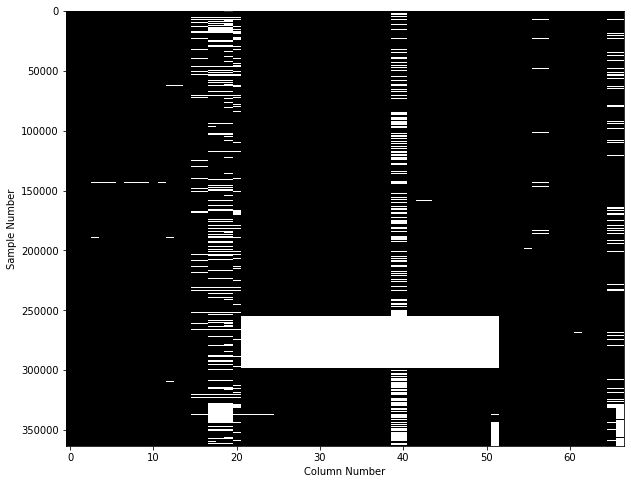

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray")
# notice huge white gap of missing values in datasets
plt.xlabel("Column Number")
plt.ylabel("Sample Number")

In [ ]:
# Drop rows with more than 80% missing data

In [29]:
df = df.dropna(thresh=df.shape[1] * 0.80, axis=0).reset_index(drop=True)
df.shape

(319790, 67)

### 2.2.2. Per Feature (column)

<AxesSubplot:title={'center':'Percentage of missing values per feature'}, ylabel='Ratio of missing values per feature'>

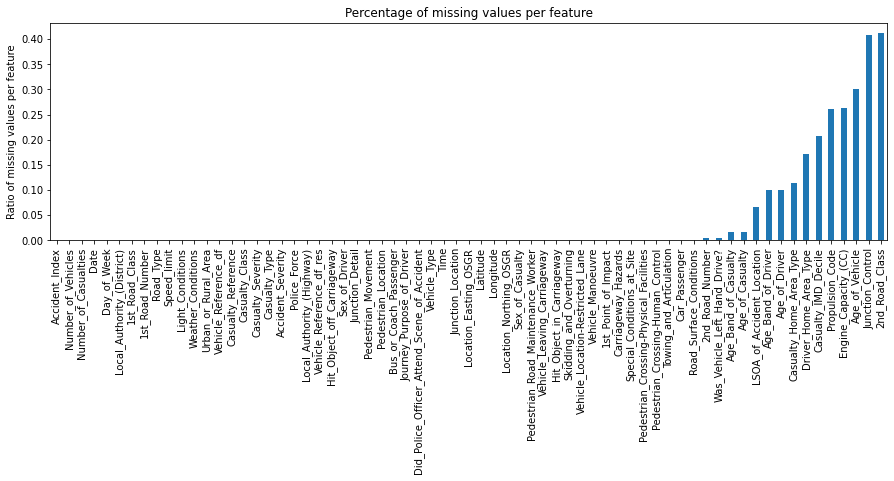

In [30]:
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature")

In [31]:
# Drop columns/features with more than 85% missing data

In [32]:
df = df.dropna(thresh=df.shape[0] * 0.85, axis=1)
df.shape

(319790, 60)

### 2.3. Outliers

### 2.3.1. Numerical features

**Global plot** of the dataset for the numerical features using pandas' `.plot()` with following parameters:

- `lw=0`: `lw` stands for line width. `0` means that we don't want to show any lines
- `marker="."`: Instead of lines, we tell the plot to use `.` as markers for each data point
- `subplots=True`: `subplots` tells `pandas` to plot each feature in a separate subplot
- `layout=(-1, 4)`: This parameter tells `pandas` how many rows and columns to use for the subplots. The `-1` means "as many as needed", while the `2` means to use 2 columns per row.
- `figsize=(15, 30), markersize=1`: To make sure that the figure is big enough we recommend to have a figure height of roughly the number of features, and to adjust the `markersize` accordingly.

In [ ]:
# Each point in this figure is a sample in our dataset and each subplot 
# represents a different feature. The y-axis shows the feature value, while the x-axis is the sample index.

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplo

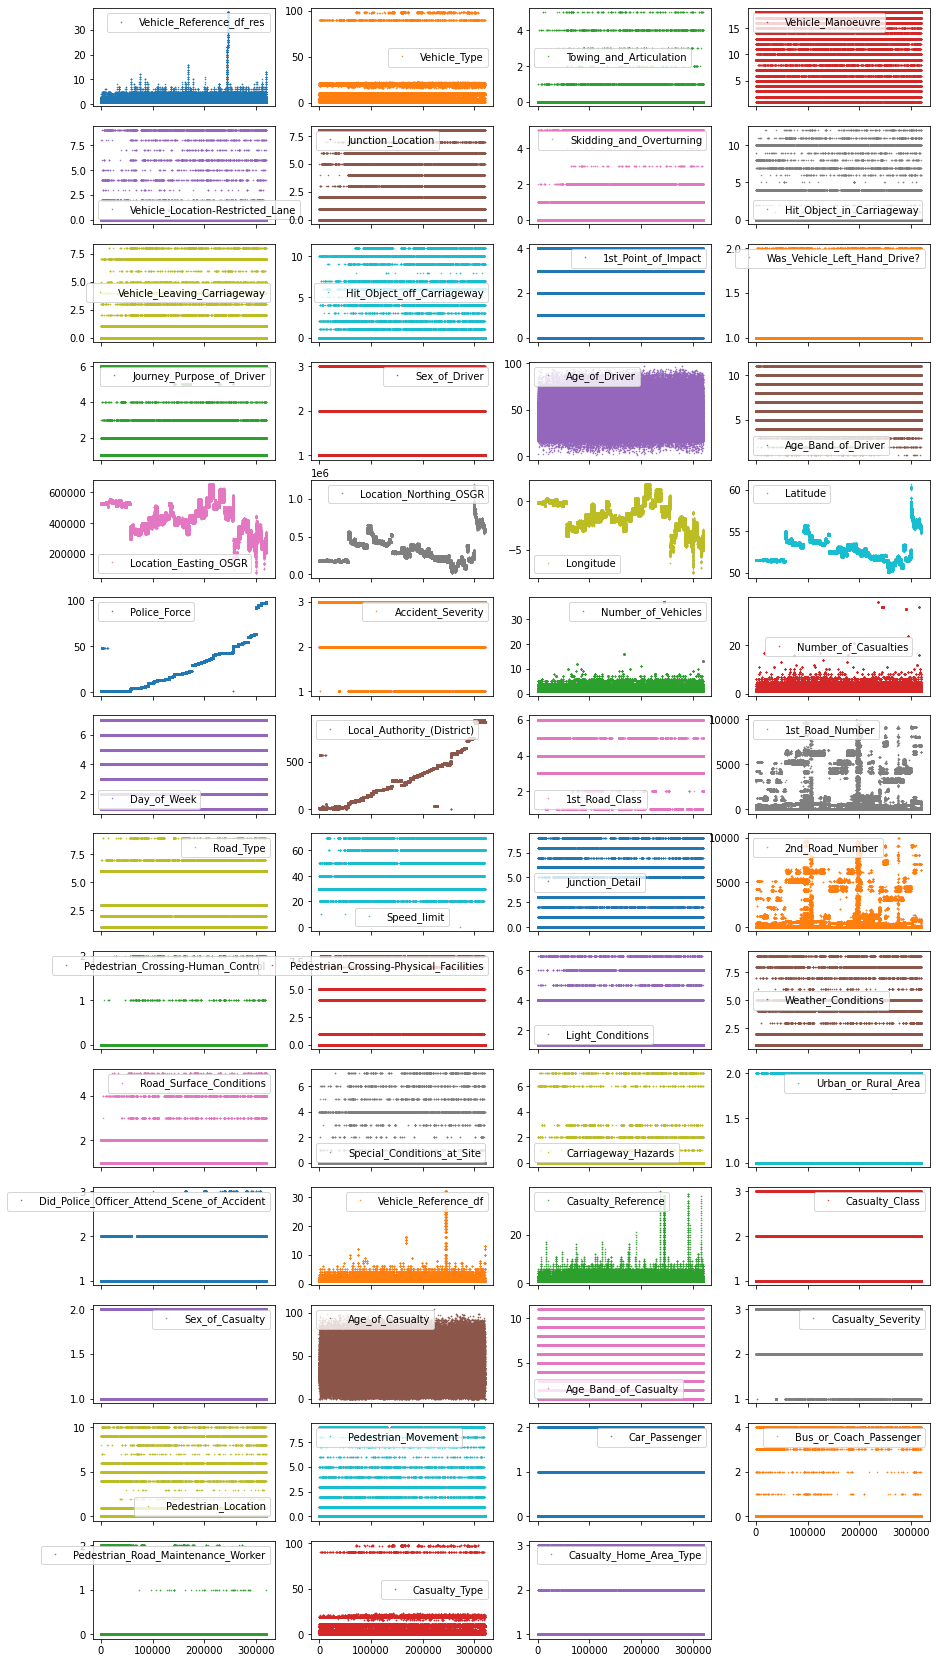

In [33]:
df.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 30), markersize=1)

### 2.3.2. Non-numerical features

In [35]:
# Global look at how many unique values each of these non-numerical features contain and their most frequent category.

In [36]:
df.describe(exclude=["number", "datetime"])

,Accident_Index,Date,Time,Local_Authority_(Highway),LSOA_of_Accident_Location
count,319790,319790,319746,319790,298693
unique,123645,365,1439,204,25977
top,201543P296025,14/02/2015,17:30,E10000017,E01028497
freq,1332,2144,2969,8457,1456


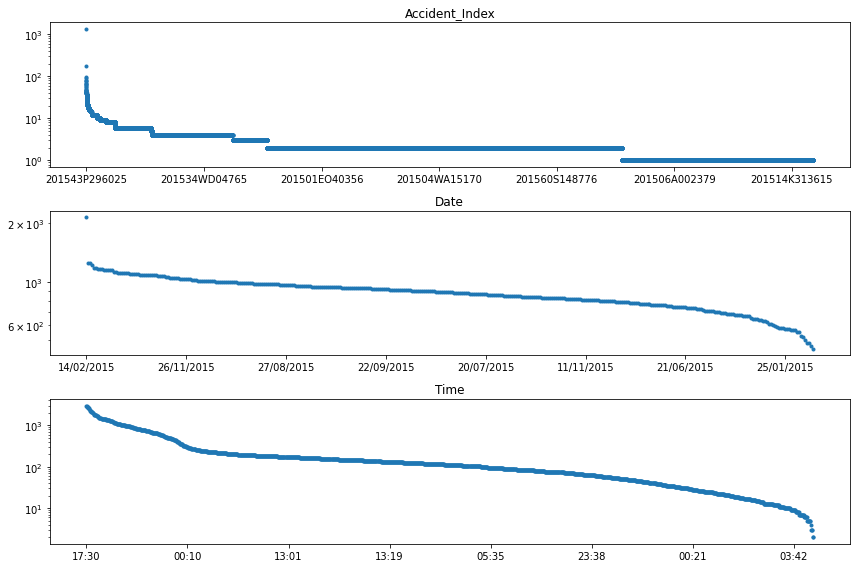

In [37]:
# Create figure object with 3 subplots
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(12, 8))

df_non_numerical = df.select_dtypes(exclude=["number", "datetime"])

for col, ax in zip(df_non_numerical.columns, axes.ravel()):
    df_non_numerical[col].value_counts().plot(
        logy=True, title=col, lw=0, marker=".", ax=ax)
plt.tight_layout()

In [38]:
# Remove the 10 most frequent accidents from this dataset because it seems like unusual behavior in dataset.
accident_ids = df_non_numerical["Accident_Index"].value_counts().head(10).index
accident_ids

Index(['201543P296025', '2015621500156', '201597AC70404', '2015984141415',
       '201522D501706', '201501RY10259', '201542I309809', '2015160C06511',
       '20154100T3095', '2015300013662'],
      dtype='object')

In [39]:
df = df[~df["Accident_Index"].isin(accident_ids)]
df.shape

(317665, 60)

## 3. Content Investigation

### 3.1. Feature distribution

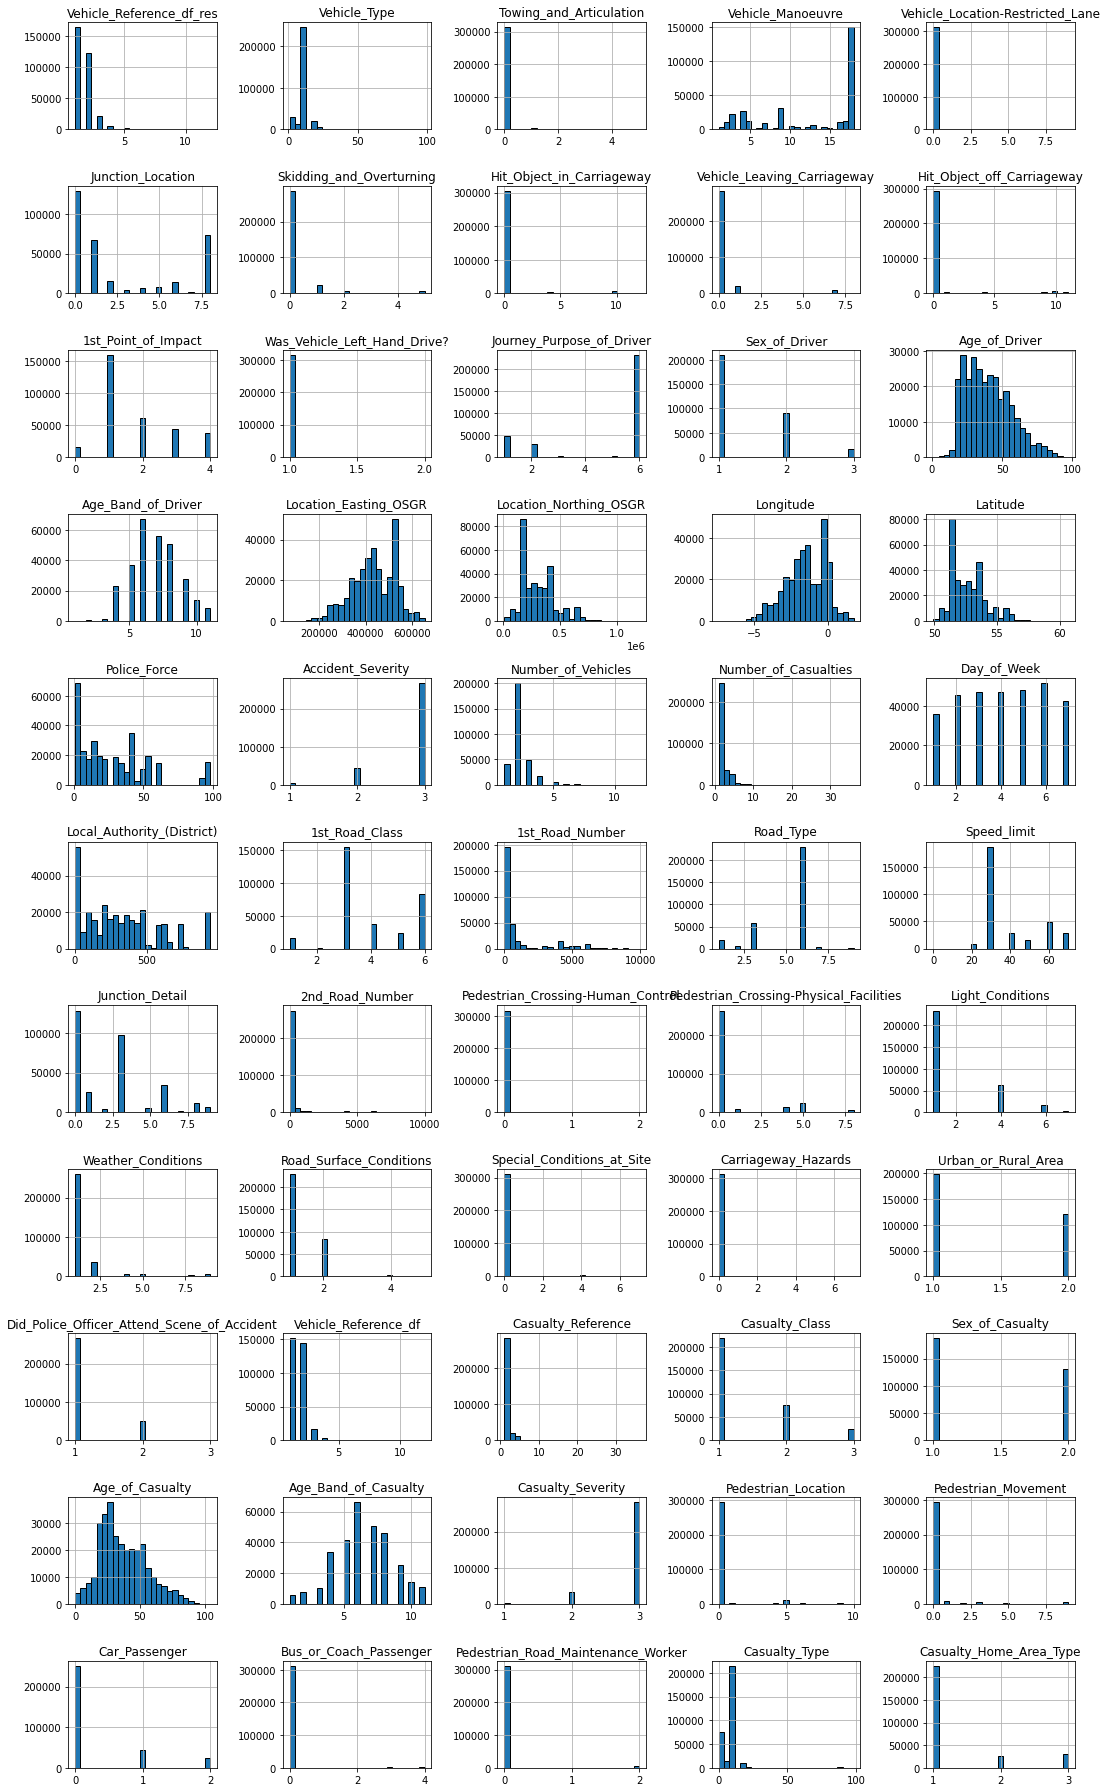

In [40]:
# Plots the histogram for each numerical feature in a separate subplot
df.hist(bins=25, figsize=(15, 25), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

In [41]:
# Collects for each feature the most frequent entry
most_frequent_entry = df.mode()

df_freq = df.eq(most_frequent_entry.values, axis=1)
df_freq = df_freq.mean().sort_values(ascending=False)

# Show the 5 top features with the highest ratio of singular value content - are they informative?
display(df_freq.head())

Pedestrian_Crossing-Human_Control    0.995259
Was_Vehicle_Left_Hand_Drive?         0.990137
Carriageway_Hazards                  0.983646
Towing_and_Articulation              0.983221
Vehicle_Location-Restricted_Lane     0.982088
dtype: float64

<AxesSubplot:>

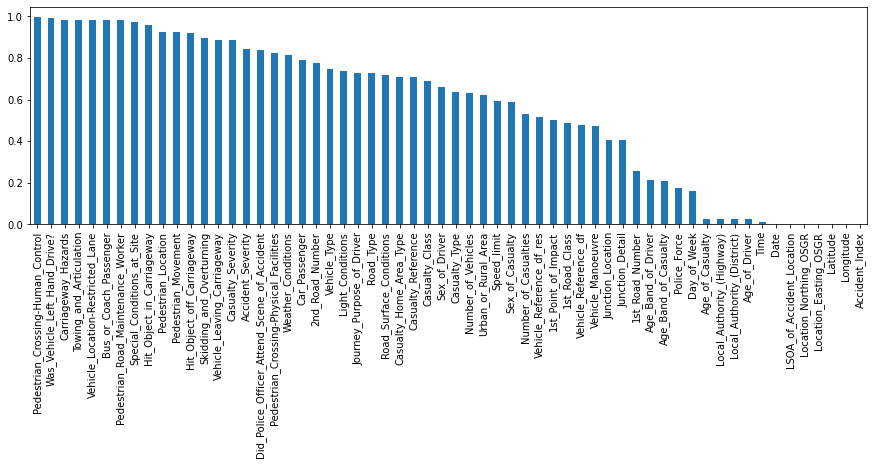

In [42]:
# Visualize the 'df_freq' table
df_freq.plot.bar(figsize=(15, 4))

**Skewed value distributions**: Transform these values to make them more normal distributed.

### 3.2. Feature patterns

1. Can we identify particular patterns within a feature that will help us to decide if some entries need to be dropped or modified?
2. Can we identify particular relationships between features that will help us to better understand our dataset?

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

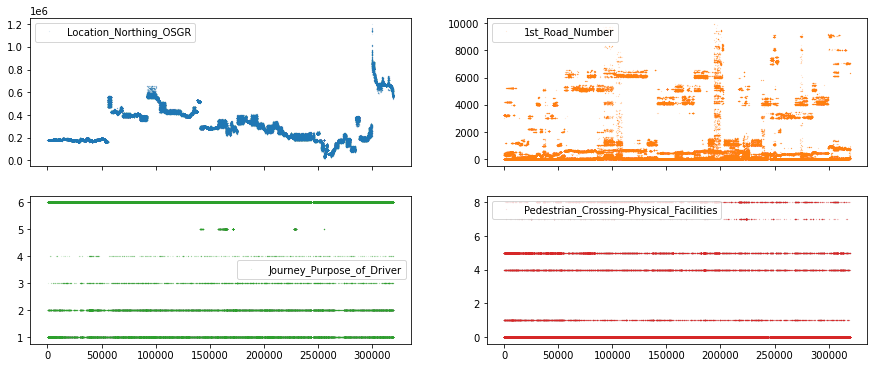

In [43]:
# Plots the difference between discrete and continuous numerical features
df[["Location_Northing_OSGR", "1st_Road_Number",
      "Journey_Purpose_of_Driver", "Pedestrian_Crossing-Physical_Facilities"]].plot(
    lw=0, marker=".", subplots=True, layout=(-1, 2), markersize=0.1, figsize=(15, 6))

In [44]:
# Creates mask to identify numerical features with more or less than 25 unique features
cols_continuous = df.select_dtypes(include="number").nunique() >= 25

### 3.2.1. Continuous features

In [45]:
# Create a new dataframe which only contains the continuous features
df_continuous = df[cols_continuous[cols_continuous].index]
df_continuous.shape

(317665, 11)

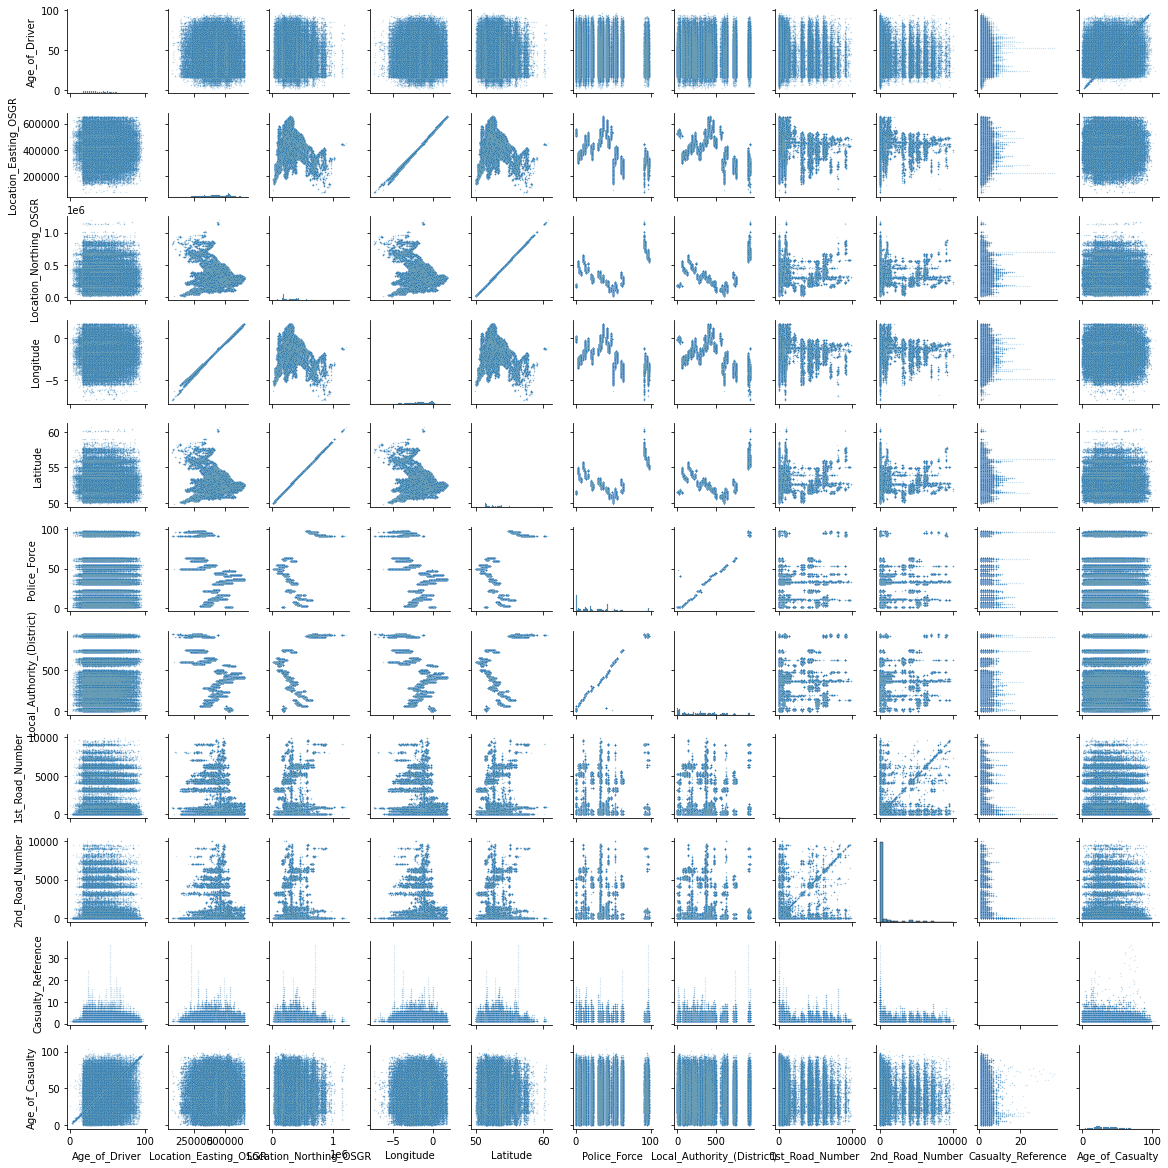

In [46]:
import seaborn as sns
# Plots pairwise plots between continuous features
sns.pairplot(df_continuous, height=1.5, plot_kws={"s": 2, "alpha": 0.2})

### 3.2.2. Discrete and ordinal features

In [47]:
# Create a new dataframe which doesn't contain the numerical continuous features
df_discrete = df[cols_continuous[~cols_continuous].index]
df_discrete.shape

(317665, 44)

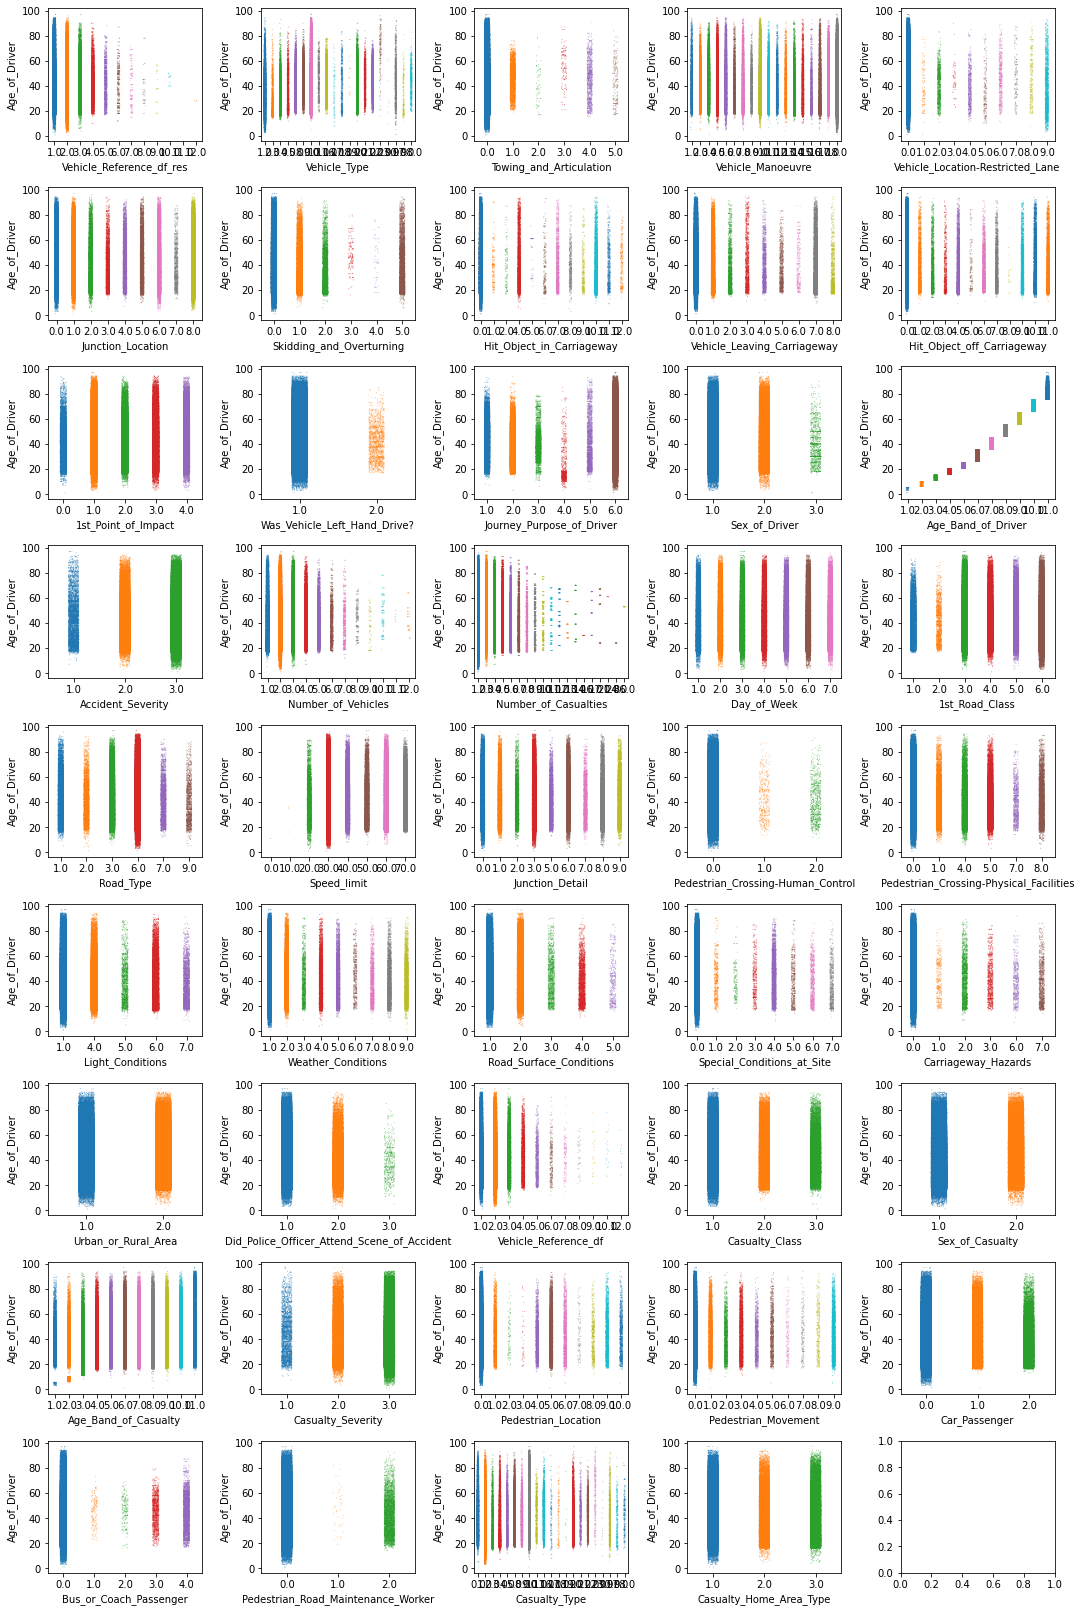

In [48]:
import numpy as np

# Number of columns and rows needed to plot all features
n_cols = 5
n_elements = len(df_discrete.columns)
n_rows = np.ceil(n_elements / n_cols).astype("int")

# Specify y_value (some continuous feature to spread data)
y_value = df["Age_of_Driver"]

fig, axes = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(15, n_rows * 2.5))

# Loop through features and put each seaborn subplot on a matplotlib axis object
for col, ax in zip(df_discrete.columns, axes.ravel()):
    sns.stripplot(data=df, x=col, y=y_value, ax=ax, palette="tab10", size=1, alpha=0.5)
plt.tight_layout()

In [50]:
selected_features = ["Vehicle_Reference_df_res", "Towing_and_Articulation",
                     "Skidding_and_Overturning", "Bus_or_Coach_Passenger",
                     "Pedestrian_Road_Maintenance_Worker", "Age_Band_of_Driver"]

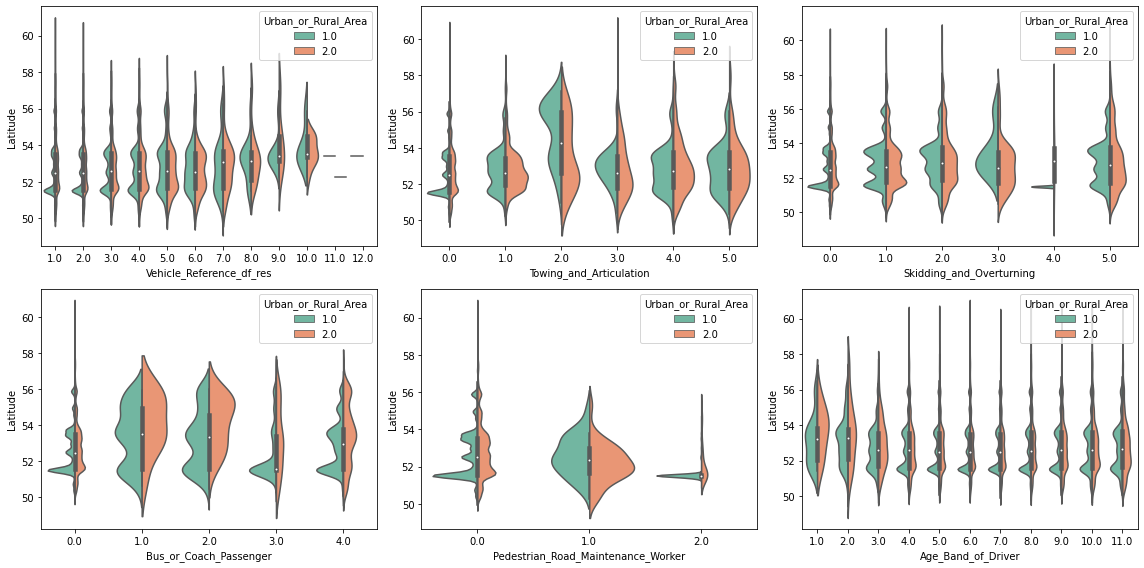

In [51]:
# Create a figure with 3 x 2 subplots
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(16, 8))

# Spread these features and plot against `Latitude`
for col, ax in zip(selected_features, axes.ravel()):
    sns.violinplot(data=df, x=col, y=df["Latitude"], palette="Set2",
                   split=True, hue="Urban_or_Rural_Area", ax=ax)
plt.tight_layout()

### 3.3. Feature relationships

In [52]:
# Computes feature correlation
df_corr = df.corr(method="pearson")

**Note**: Depending on the dataset and the kind of features (e.g. ordinal or continuous features) you might want to use the `spearman` method instead of the `pearson` method to compute the correlation. Whereas the **Pearson** correlation evaluates the linear relationship between two continuous variables, the **Spearman** correlation evaluates the monotonic relationship based on the ranked values for each feature. 

And to help with the interpretation of this correlation matrix, let's use seaborn's `.heatmap()` to visualize it.

<AxesSubplot:>

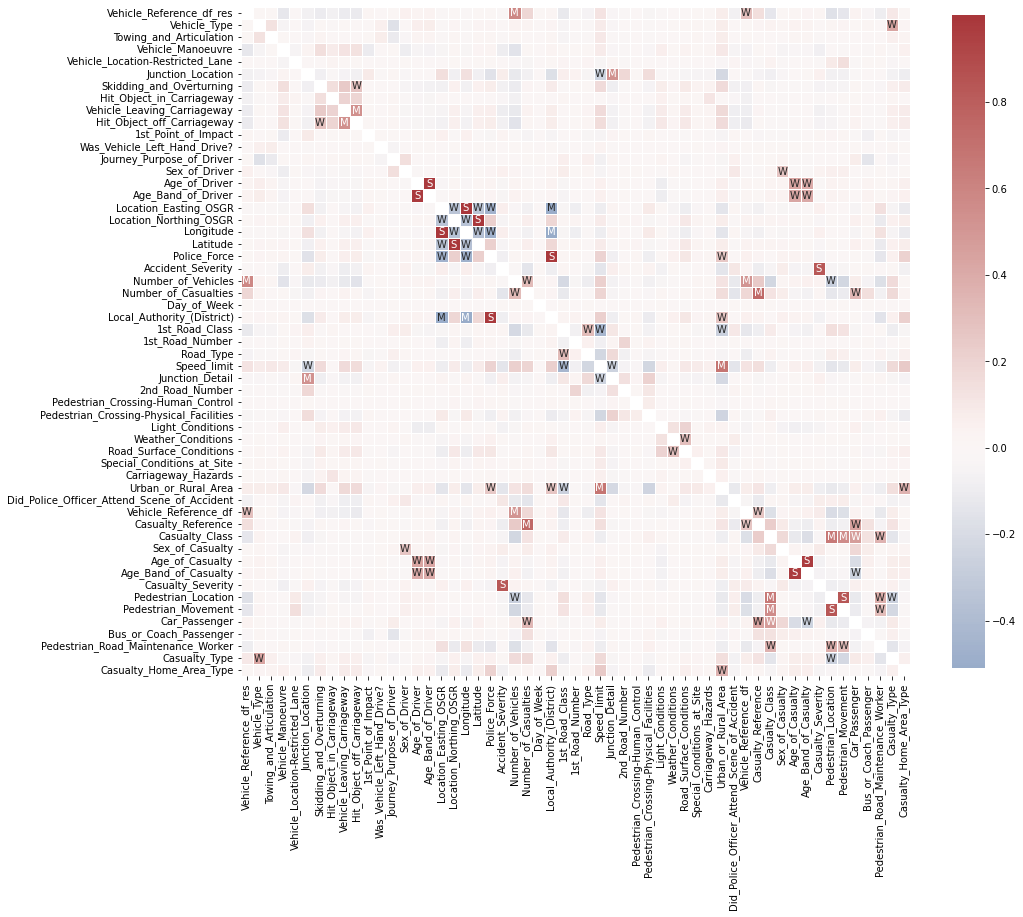

In [53]:
# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8})

In [54]:
#  Creates a mask to remove the diagonal and the upper triangle.
lower_triangle_mask = np.tril(np.ones(df_corr.shape), k=-1).astype("bool")

#  Stack all correlations, after applying the mask
df_corr_stacked = df_corr.where(lower_triangle_mask).stack().sort_values()

#  Showing the lowest and highest correlations in the correlation matrix
display(df_corr_stacked)

Local_Authority_(District)                   Longitude                                     -0.509343
                                             Location_Easting_OSGR                         -0.502919
Police_Force                                 Longitude                                     -0.471327
                                             Location_Easting_OSGR                         -0.461112
Speed_limit                                  1st_Road_Class                                -0.438931
Latitude                                     Longitude                                     -0.362052
Longitude                                    Location_Northing_OSGR                        -0.360600
Latitude                                     Location_Easting_OSGR                         -0.349785
Location_Northing_OSGR                       Location_Easting_OSGR                         -0.348244
Pedestrian_Location                          Number_of_Vehicles                            

## Pouka dana:
Iako nepisano pravilo i beskonačna petlja uvek stoje na snazi, u nekom trenutku analize podataka, nakon postavljenih temelja znanja o našim podacima, je potrebno stati i krenuti dalje u vode mašinskog učenja. To ćemo sada uraditi i sledeći čas početi rad sa modelima, ali se i konstantno vraćati na sve što smo do sada prošli!